# Student Performance Indicator

## Life cycle of Machine Learning Project

- Understanding the Problem Statement  
- Data Collection  
- Data Checks to perform  
- Exploratory data analysis  
- Data Pre-Processing  
- Model Training  
- Choose best model

## 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show top 10 records

In [5]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### Shape of the dataset

In [6]:
df.shape

(1000, 8)

#### 2.2 Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,- - some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check missing values

In [18]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the data set

##### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

0

: 

##### There are no duplicates values in the data set

##### 3.3 Check Datatypes

In [ ]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


: 

3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

: 

3.5 Check statistics of data set


In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


: 

##### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

##### 3.7 Exploring Data

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
print("Categories in gender variable:", end =" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


##### define numerical & categorical columns

In [ ]:
numerical_features =  [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features =  [feature for feature in df.columns if df[feature].dtype == 'O']
#print(numerical_features)
#print(categorical_features)

print("we have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features: {}".format(len(categorical_features), categorical_features))

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 3.8 Adding columns for "Total Score" and "Average"

In [70]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [100]:
math_full = df[df['math_score']== 100]['average'].count()
read_full = df[df['reading_score']== 100]['average'].count()
write_full = df[df['writing_score']== 100]['average'].count()

print("Number of students with full math score: {}".format(math_full))
print(f'Number of students with full reading score: {read_full}')
print(f'Number of students with full writing score: {write_full}')

Number of students with full math score: 7
Number of students with full reading score: 17
Number of students with full writing score: 14


In [104]:
read_less_20 = df[df['reading_score'] < 20]['average'].count()
write_less_20 = df[df['writing_score'] < 20]['average'].count()
math_less_20 = df[df['math_score'] < 20]['average'].count()

print("Number of students with full math score: {}".format(math_less_20))
print(f'Number of students with full reading score: {read_less_20}')
print(f'Number of students with full writing score: {write_less_20}')

Number of students with full math score: 4
Number of students with full reading score: 1
Number of students with full writing score: 3


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

#### Exploring Data ( Visualization )
##### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

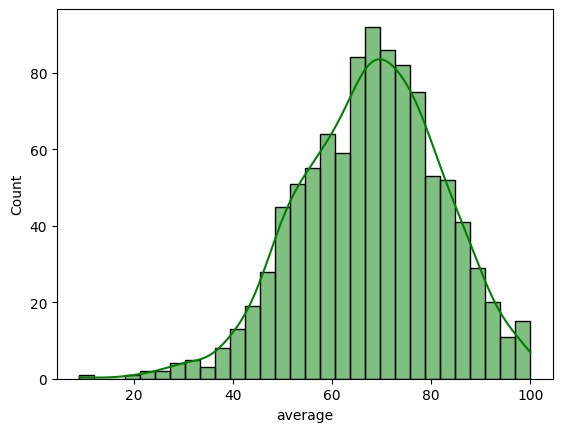

In [112]:
sns.histplot(data = df, x="average", bins = 30, kde=True,color = 'g')

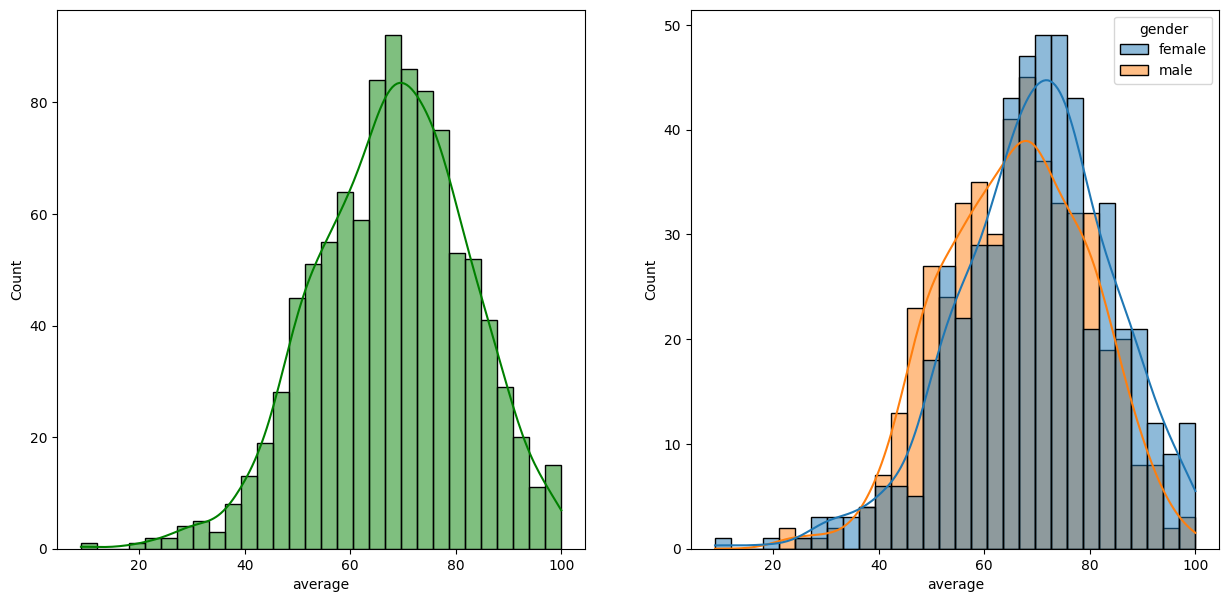

In [119]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
sns.histplot(data = df, x="average", bins = 30, kde=True,color = 'g', ax = axs[0])
sns.histplot(data = df, x="average", bins = 30, kde=True,color = 'g', hue = 'gender', ax = axs[1])
plt.show() # this is used to render the plot outside the notebook

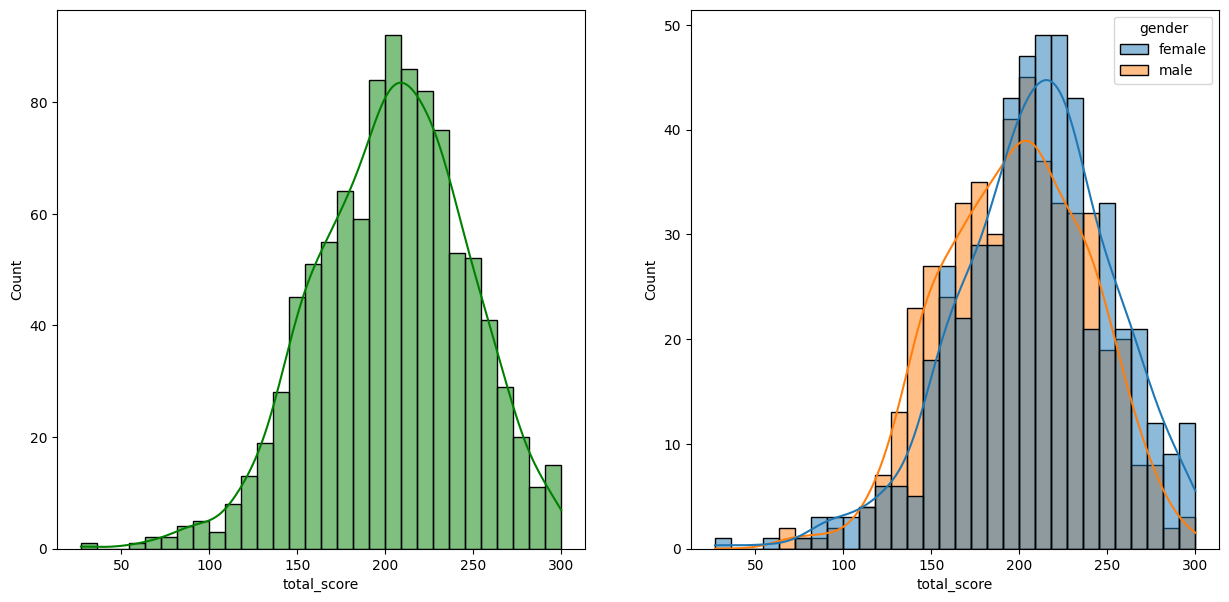

In [124]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x="total_score", bins = 30, kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data = df, x="total_score", bins = 30, kde=True,color = 'g', hue = 'gender')
plt.show() # this is used to render the plot outside the notebook

##### Insights
- Female students tend to perform well then male students.

<Axes: xlabel='average', ylabel='Count'>

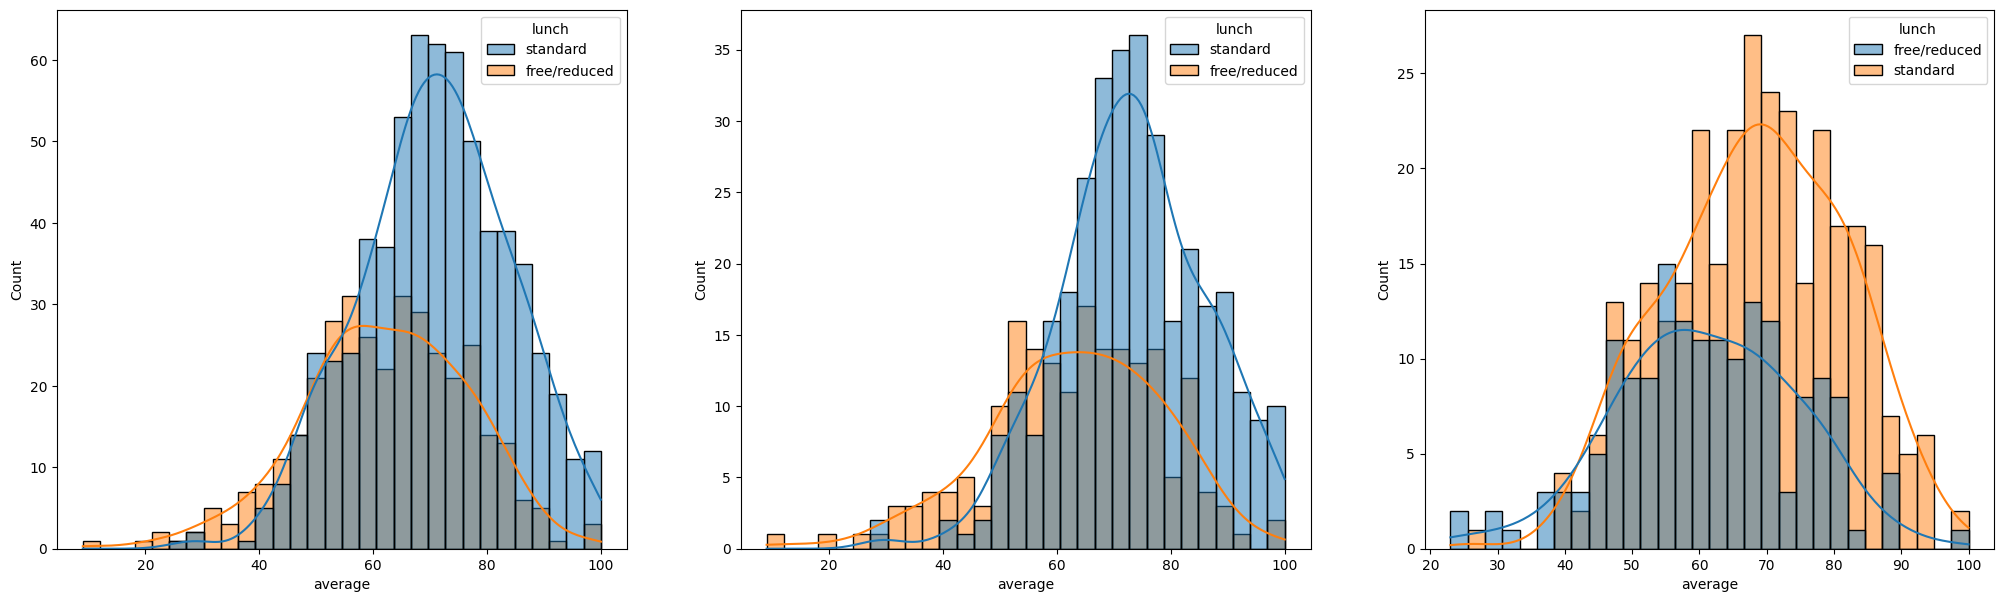

In [132]:
fig,axs=plt.subplots(1,3,figsize = (25,7))
sns.histplot(data=df, x='average', bins = 30, kde = True, hue = 'lunch', ax = axs[0])
sns.histplot(data=df[df['gender']=='female'], x='average', bins = 30, kde = True, hue = 'lunch',ax = axs[1])
sns.histplot(data=df[df['gender']=='male'], x='average', bins = 30, kde = True, hue = 'lunch',ax = axs[2])

##### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

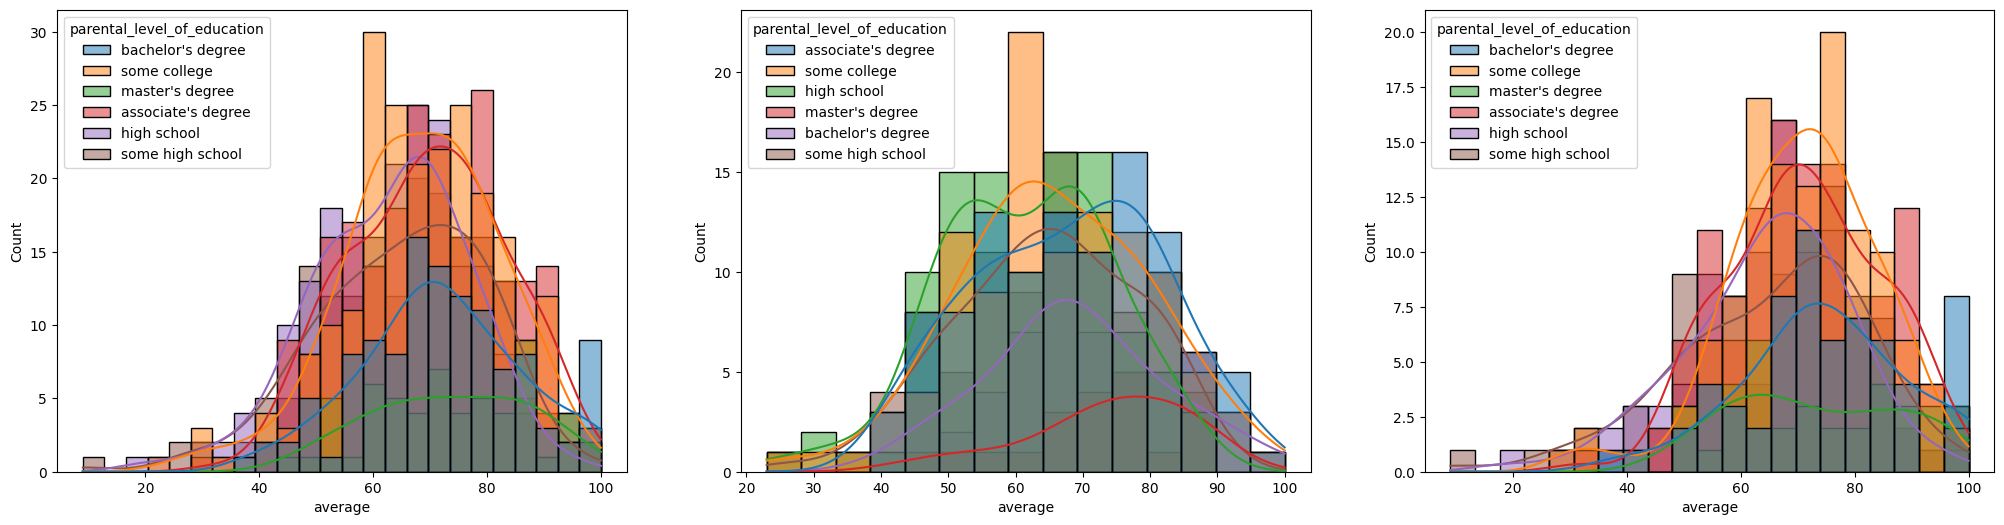

In [137]:
fig,axs = plt.subplots(1,3,figsize=(25,6))

ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education', ax = axs[0])

ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education', ax = axs[1])

ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', ax = axs[2])
plt.show()

#### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

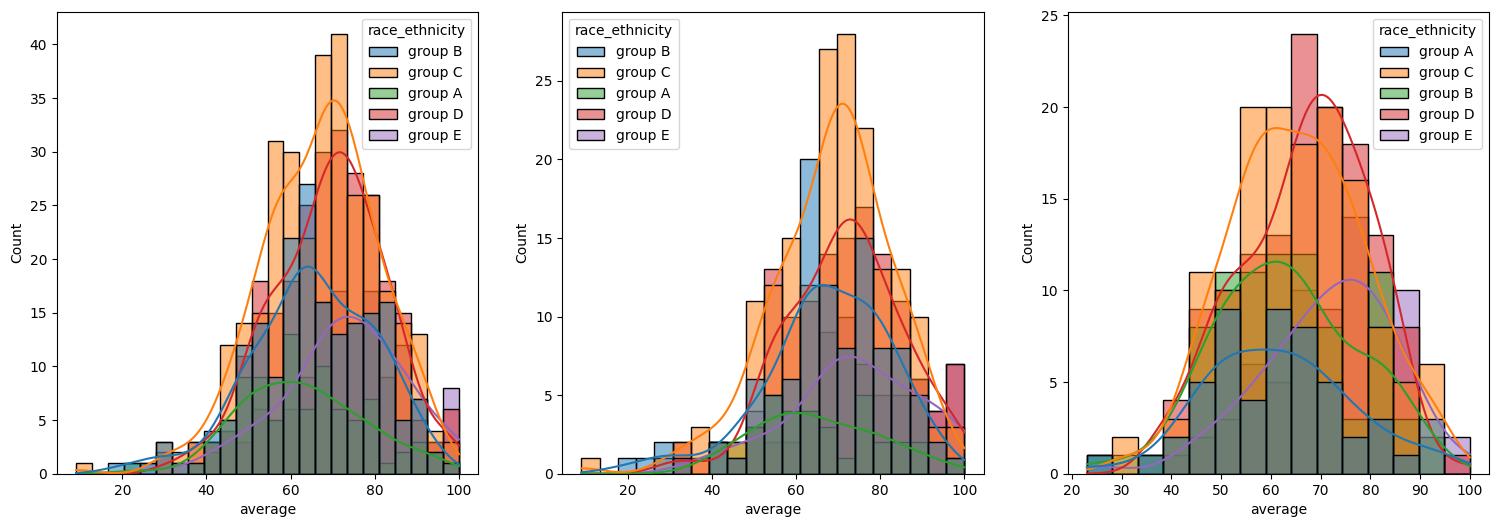

In [139]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximumum score of students in all three subjects

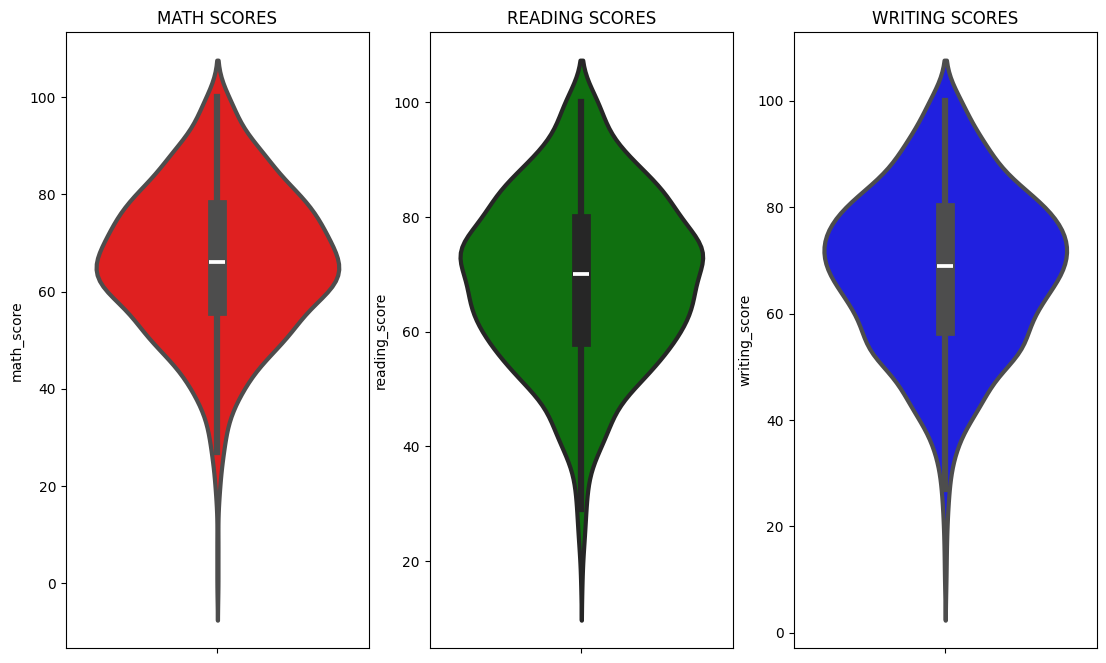

In [141]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80